In [34]:
import pandas as pd
import numpy as np
import json
import pickle
import matplotlib.pyplot as plt
import logging
import scipy.stats as sts
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import os

from arch import arch_model

In [2]:
ini_work_dir = os.getcwd()
os.chdir('..')

In [3]:
from rules_related import combine_rules_outputs
from whole_algorithm import train_model
from auxiliary import calc_log_returns, unpack_1d_parameters
from multivariate_normal_distribution import LongMultivariateNormal
from model import FuzzyVolatilityModel
from antecedent_fitting import fit_antecedent_params
from local_models import calculate_retraining_garch_forecasts

In [4]:
with open('config.json') as file:
    config = json.load(file)

In [33]:
files_folder = config['files_folders']['processed']
RESEARCH_RESULTS_FOLDER = config['files_folders']['research_results']
antecedent_params_folder = config['files_folders']['antecedent_params_sets']
logs_folder = config['files_folders']['logs']

In [32]:
TESTED_MODEL_FILE_NAME = 'tested_model_seasonal'
TESTED_MODEL_WOS_FILE_NAME = 'tested_model_wo_seas'

In [27]:
logger = logging.getLogger(f'test_calc')  # apf == antecedent params fitting

_log_file = f'{logs_folder}/{logger.name}.log'
logging.basicConfig(level=logging.INFO,
                    filename=_log_file,
                    filemode='w',
                    format='%(asctime)s,%(msecs)d %(name)s %(levelname)s %(message)s',
                    datefmt='%H:%M:%S')

In [28]:
pd.options.display.precision = 15
pd.options.display.max_colwidth = 300

# Reading

In [9]:
_files = ['fitting_consequent_params_seasonal_result_nb_0_2022-09-25 00-55-51.622882.pkl']
res_big = [pd.read_pickle(f'{RESEARCH_RESULTS_FOLDER}/{_file}') for _file in _files]
_res = [_elem for res_piece in res_big for _elem in res_piece['result']].copy()

res = pd.DataFrame.from_records(_res).copy()

In [10]:
if (res['status'] != 0).any():
    raise Error('Not all models were fitted')

In [13]:
fitted_ap = res[res['rmse'] == res['rmse'].min()].iloc[0]['antecedent_params'].copy()
fitted_ap

[{'a': [2.8660254037844384, 1.0],
  'b': [3.133974596215561, 1.0],
  'c': [5.0, 2.8660254037844384],
  'd': [5.0, 3.133974596215561],
  'n_clusters': 2},
 {'centers': (-7.5, -1.5, -0.5, 6.0),
  'variances': (4, 4, 4, 4),
  'n_clusters': 4}]

In [16]:
fvm = res[res['rmse'] == res['rmse'].min()].iloc[0]['fvm']

In [23]:
test = res_big[0]['test'].copy()
data_to_cluster_test = res_big[0]['data_to_cluster_test'].copy()

# Live feeding

In [29]:
%%time

fvm.feed_daily_data(test, data_to_cluster=data_to_cluster_test)

In [37]:
_cur_time = str(pd.Timestamp.today()).replace(':', '-')
print(_cur_time)

with open(f'{RESEARCH_RESULTS_FOLDER}/{TESTED_MODEL_FILE_NAME}_{_cur_time}.pkl', 'wb') as _file:
    pickle.dump(fvm, _file)

2022-09-25 15-10-07.548615


In [31]:
fvm.hist_output

2014-05-30    4.161368899011740e-04
2014-06-02    4.559671887189313e-04
2014-06-03    4.559671887189313e-04
2014-06-04    3.835546752981120e-04
2014-06-05    7.382136719309691e+04
2014-06-06    3.531735693706811e+00
2014-06-09    2.309062931702795e-03
2014-06-10    2.928422261592191e+01
2014-06-11    6.747001455078956e+00
2014-06-16    9.581647593851344e+12
dtype: float128

In [71]:
fvm.membership_degrees_hist

,0,1,2,3,4,5,6,7
<DATE>,,,,,,,,
2014-05-30,0.000000000000000e+00,0.000000000000000,0.000000000000000,0.000000000000000e+00,3.518809522655875e-31,0.075422720648304,0.924577279351696,3.766950148948009e-20
2014-06-02,0.000000000000000e+00,0.000000000000000,0.000000000000000,0.000000000000000e+00,3.518809522655875e-31,0.075422720648304,0.924577279351696,3.766950148948009e-20
2014-06-03,0.000000000000000e+00,0.000000000000000,0.000000000000000,0.000000000000000e+00,3.552778817715343e-31,0.075519529243103,0.924480470756897,3.732740400657512e-20
2014-06-04,1.818306936613015e-31,0.037877512015944,0.462122487984056,1.825487612214254e-20,1.818306936613009e-31,0.037877512015944,0.462122487984055,1.825487612214248e-20
2014-06-05,3.574848435492310e-31,0.075581991527831,0.924418008472169,3.710853737617510e-20,0.000000000000000e+00,0.000000000000000,0.000000000000000,0.000000000000000e+00
2014-06-06,3.523038259305519e-31,0.075434816558680,0.924565183441320,3.762656490536060e-20,0.000000000000000e+00,0.000000000000000,0.000000000000000,0.000000000000000e+00
2014-06-09,0.000000000000000e+00,0.000000000000000,0.000000000000000,0.000000000000000e+00,3.553660337201577e-31,0.075522030661714,0.924477969338286,3.731861115905130e-20
2014-06-10,0.000000000000000e+00,0.000000000000000,0.000000000000000,0.000000000000000e+00,3.348757506626773e-31,0.074925424162141,0.925074575837859,3.948350803370083e-20
2014-06-11,1.668106738922427e-31,0.037443935422691,0.462556064577310,1.981222197205928e-20,1.668106738922422e-31,0.037443935422691,0.462556064577308,1.981222197205922e-20


In [72]:
_.shape

(10, 8)

In [75]:
pd.DataFrame.from_records(fvm._membership_degrees_hist)

,0,1,2,3,4,5,6,7
0,3.380497280842044e-31,0.075019896795733,0.924980103204267,3.913144954487117e-20,0.000000000000000e+00,0.000000000000000,0.000000000000000,0.000000000000000e+00
1,3.509855975803523e-31,0.075397067778069,0.924602932221930,3.776074385550210e-20,0.000000000000000e+00,0.000000000000000,0.000000000000000,0.000000000000000e+00
2,0.000000000000000e+00,0.000000000000000,0.000000000000000,0.000000000000000e+00,3.518809522655875e-31,0.075422720648304,0.924577279351696,3.766950148948009e-20
3,0.000000000000000e+00,0.000000000000000,0.000000000000000,0.000000000000000e+00,3.518809522655875e-31,0.075422720648304,0.924577279351696,3.766950148948009e-20
4,0.000000000000000e+00,0.000000000000000,0.000000000000000,0.000000000000000e+00,3.518809522655875e-31,0.075422720648304,0.924577279351696,3.766950148948009e-20
5,0.000000000000000e+00,0.000000000000000,0.000000000000000,0.000000000000000e+00,3.552778817715343e-31,0.075519529243103,0.924480470756897,3.732740400657512e-20
6,1.818306936613015e-31,0.037877512015944,0.462122487984056,1.825487612214254e-20,1.818306936613009e-31,0.037877512015944,0.462122487984055,1.825487612214248e-20
7,3.574848435492310e-31,0.075581991527831,0.924418008472169,3.710853737617510e-20,0.000000000000000e+00,0.000000000000000,0.000000000000000,0.000000000000000e+00
8,3.523038259305519e-31,0.075434816558680,0.924565183441320,3.762656490536060e-20,0.000000000000000e+00,0.000000000000000,0.000000000000000,0.000000000000000e+00
9,0.000000000000000e+00,0.000000000000000,0.000000000000000,0.000000000000000e+00,3.553660337201577e-31,0.075522030661714,0.924477969338286,3.731861115905130e-20


In [79]:
test.index.dayofweek

Int64Index([4, 0, 1, 2, 3, 4, 0, 1, 2, 0], dtype='int64', name='<DATE>')

In [83]:
res_big[0]['data_to_cluster_test'][0]

<DATE>
2014-05-30    5
2014-06-02    1
2014-06-03    2
2014-06-04    3
2014-06-05    4
2014-06-06    5
2014-06-09    1
2014-06-10    2
2014-06-11    3
2014-06-16    1
Name: <DATE>, dtype: int64

In [76]:
fitted_ap

[{'a': [2.8660254037844384, 1.0],
  'b': [3.133974596215561, 1.0],
  'c': [5.0, 2.8660254037844384],
  'd': [5.0, 3.133974596215561],
  'n_clusters': 2},
 {'centers': (-7.5, -1.5, -0.5, 6.0),
  'variances': (4, 4, 4, 4),
  'n_clusters': 4}]

In [57]:
fvm._parameters_hist

[{'alpha_0': array([2.41731162e-05, 3.76521351e-04, 3.76521342e-04, 2.39405304e+02,
         6.13963787e+01, 9.43245163e+01, 6.31744444e+00, 2.41731162e-05]),
  'alpha': array([[9.99455593e-11, 1.70499766e-01, 1.70495728e-01, 1.00000000e-10,
          1.00000000e-10, 1.00000000e-10, 1.00000000e-10, 1.00000000e-10]]),
  'beta': array([[9.53674785e-01, 1.09311238e-18, 1.18216909e-18, 9.53674785e-01,
          9.53674785e-01, 9.53674785e-01, 9.53674785e-01, 9.53674785e-01]])},
 {'alpha_0': array([2.41731162e-05, 5.00970222e-03, 2.21191437e-06, 1.63097569e+00,
         3.23480643e+02, 1.09019313e+02, 1.45733198e+01, 1.72129064e-04]),
  'alpha': array([[9.99703627e-11, 1.72382650e-01, 1.72378481e-01, 1.00000000e-10,
          1.00000000e-10, 1.00000000e-10, 1.00000000e-10, 1.00000000e-10]]),
  'beta': array([[9.53674785e-01, 3.62669817e-17, 3.64020303e-17, 9.53674785e-01,
          9.53674785e-01, 9.53674785e-01, 9.53674785e-01, 9.53674785e-01]])},
 {'alpha_0': array([2.41731162e-05, 7.8919

In [70]:
fvm.show_ls_results()

,cost,optimality,nfev,njev,status,message,success
0,1.379169175650859e-04,1.562071446543374e-12,13,13,1,`gtol` termination condition is satisfied.,True
1,1.377578145468992e-04,3.355614191241390e-09,3,3,1,`gtol` termination condition is satisfied.,True
2,1.376849254741224e-04,5.974477300801142e-09,27,27,1,`gtol` termination condition is satisfied.,True
3,1.376849254741224e-04,5.974477507212042e-09,1,1,1,`gtol` termination condition is satisfied.,True
4,1.377182194966679e-04,1.000854194053728e-10,2,2,1,`gtol` termination condition is satisfied.,True
5,2.697549122512202e+11,5.100080720501268e+11,2400,2400,0,The maximum number of function evaluations is exceeded.,False
6,6.172596923483437e+02,1.150679892179233e+03,26,26,3,`xtol` termination condition is satisfied.,True
7,3.100001089252962e-04,3.707057578472411e-04,12,12,3,`xtol` termination condition is satisfied.,True
8,4.244815185286123e+04,8.181116398618006e+04,47,47,3,`xtol` termination condition is satisfied.,True
9,2.253029362018851e+03,4.328751242509218e+03,7,7,3,`xtol` termination condition is satisfied.,True


In [65]:
res_big[0].keys()

dict_keys(['result', 'fitted', 'train', 'test', 'antecedent_params_set', 'consequent_metaparams', 'consequent_params_ini', 'clusterization_method', 'local_method', 'data_to_cluster_train', 'data_to_cluster_test'])

In [48]:
mse = mean_squared_error(fvm.hist_output, test ** 2, squared=True)
rmse = mean_squared_error(fvm.hist_output, test ** 2, squared=False)

In [49]:
rmse

3029983013364.2209525

In [42]:
mse

9.1807970612757247673e+24

In [44]:
test ** 2

<DATE>
2014-05-30    0.000211017194746
2014-06-02    0.000418175073795
2014-06-03    0.000001302128287
2014-06-04    0.000000402242047
2014-06-05    0.000045733476175
2014-06-06    0.000351402075281
2014-06-09    0.000003513689095
2014-06-10    0.000027735666012
2014-06-11    0.000019770721578
2014-06-16    0.000157360739939
Name: log return, dtype: float64

In [45]:
fvm.hist_output

2014-05-30    4.161368899011740e-04
2014-06-02    4.559671887189313e-04
2014-06-03    4.559671887189313e-04
2014-06-04    3.835546752981120e-04
2014-06-05    7.382136719309691e+04
2014-06-06    3.531735693706811e+00
2014-06-09    2.309062931702795e-03
2014-06-10    2.928422261592191e+01
2014-06-11    6.747001455078956e+00
2014-06-16    9.581647593851344e+12
dtype: float128

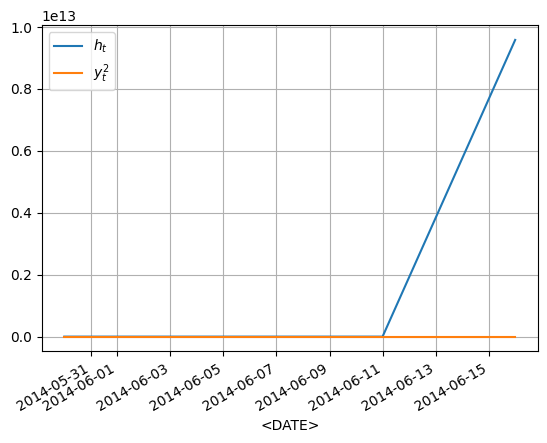

In [68]:
fvm.hist_output.plot(grid=True, label='$h_t$')
(test ** 2).plot(grid=True, label='$y_t^2$')

plt.legend()

<AxesSubplot:xlabel='<DATE>'>

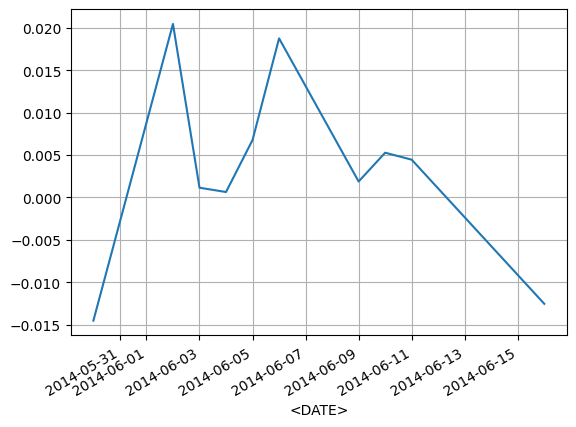

In [69]:
test.plot(grid=True)